In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nakagami
import scipy.constants as const
import scipy.stats as stats
import scipy.special as sp
import math


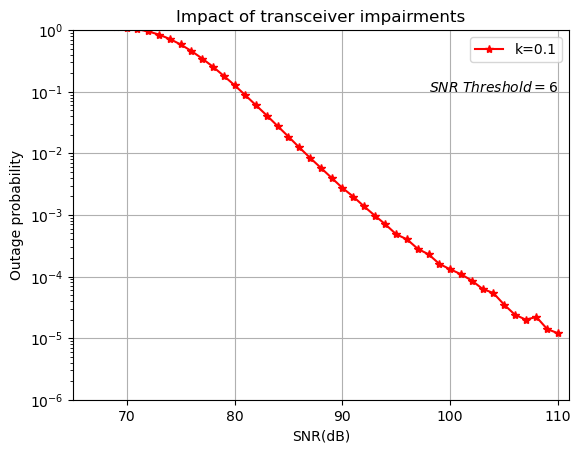

In [9]:
# Parâmetros do sistema
N = 1000000 #Númers de amostra
f = 300e9  # Frequência do portador em Hz (300 GHz)
G = 10e4  # Ganhos das antenas (40 dBi)
c = const.speed_of_light  # Velocidade da luz
k = 3.18e-4  # Coeficiente de absorção molecular
d1 = 5  # Distância da fonte para o RIS (em metros)
d2 = 25  # Distância do RIS para o destino (em metros)
noise_floor = 3.9811e-11   # Ruído de fundo (-74 dBm)

gain = ((c*G)/ (4*np.pi*f*(d1+d2)))*np.exp(-0.5*k* (d1+d2))



i=0
j=0
OP1=[]
OP2=[]



gama_th = 10**(6/10) #  3dB ou 6dB
k_f = 0.1 #fator de comprometimento do hardware [0,0.1,0.4]
N0 = 1
R = gama_th

# Valores de Alpha-Mu para os caminhos de propagação
alpha_1 = 2  # Parâmetro Alpha para o caminho 1
mu_1 = 1     # Parâmetro Mu para o caminho 1
alpha_2 = alpha_1  # Parâmetro Alpha para o caminho 2
mu_2 = 2     # Parâmetro Mu para o caminho 2

media1 = d1 ** (-alpha_2)
media2 = d2 ** (-alpha_2)



for j in np.arange(65, 111, 1):

    media1 = d1 ** (-alpha_2)
    media2 = d2 ** (-alpha_2)

    # Convert hardware impairment factor from dB to linear scale
    plin = 10**(j / 10)

    # Simulate channel conditions with hardware impairments
    r1 = np.sqrt(media1 * k) * nakagami.rvs(mu_1, loc=0, scale=1, size=N)  # Rayleigh fading with hardware impairment
    r2 = np.sqrt(media2 * k) * nakagami.rvs(mu_2, loc=0, scale=1, size=N)  # Nakagami-2 fading with hardware impairment
    Prob1 = np.sum(np.log2(1 + (r1**2*plin/N0)) < R) / N
    Prob2 = np.sum(np.log2(1 + (r2**2*plin/N0)) < R) / N
    OP1 = np.append(OP1, Prob1)
    OP2 = np.append(OP2, Prob2)
    r_des_1 = (alpha_1*np.random.gamma(mu_1 + 1 / alpha_1))**(1 / alpha_1)
    r_des_2 = (alpha_2*np.random.gamma(mu_2 + 1 / alpha_2))**(1 / alpha_2)


    # Cálculo da perda de percurso total considerando o desvanecimento
    perda_total_1 = r1 * r_des_1 ** mu_1
    perda_total_2 = r2 * r_des_2 ** mu_2

    # Cálculo da potência recebida no receptor
    potencia_recebida_1 = gain - perda_total_1
    potencia_recebida_1 = gain - perda_total_2

Pdb=np.arange(65,111,1)

plt.plot(Pdb,(OP1+OP2), 'r*-',label="k={}".format(k_f))
plt.text(98, .1, r'$ SNR \ Threshold = 6$')
plt.grid()
plt.axis([65,111,1e-6,1])
plt.xlabel('SNR(dB)')
plt.ylabel('Outage probability')
plt.title('Impact of transceiver impairments')
plt.legend()
plt.yscale('log')
plt.show()
